In [188]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

from tqdm.notebook import trange, tqdm

In [189]:
df = pd.read_csv('./mixed_guassian_dataset.csv')
df.describe()

,x
count,200000.000000
mean,3.499169
std,2.217177
min,-5.534819
25%,1.938795
50%,2.316471
75%,5.002645
max,14.743792


In [270]:
x = df.x.values
x

array([1.95114156, 3.05669659, 7.37366354, ..., 8.80098378, 1.81541894,
       1.83684851])

<AxesSubplot: ylabel='Density'>

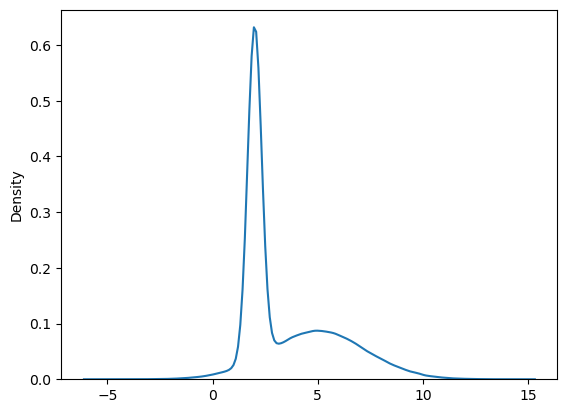

In [271]:
sns.kdeplot(x)

<AxesSubplot: ylabel='Count'>

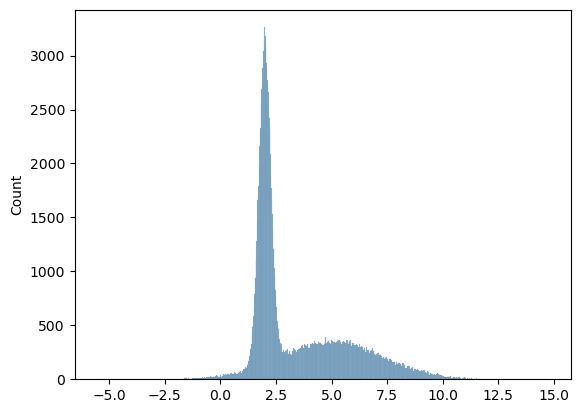

In [273]:
sns.histplot(x, bins=1000, alpha=0.5)

In [280]:
def expectation_step(mu1, mu2, sigma1, sigma2):
    p1 = norm.pdf(x, loc=mu1, scale=sigma1)
    p2 = norm.pdf(x, loc=mu2, scale=sigma2)

    return np.where(p1 >= p2, 1, 2)


In [283]:
def maximization_step(y, mu1, mu2, sigma1, sigma2):
    x1 = x[y==1]
    x2 = x[y==2]

    return np.mean(x1), np.mean(x2), np.std(x1), np.std(x2)


In [286]:
epochs = 20

mu1, mu2 = 1, 4
sigma1, sigma2 = 0.2, 1

history = pd.DataFrame(columns=['mu1', 'mu2', 'sigma1', 'sigma2'])
history.loc[len(history)] = [mu1, mu2, sigma1, sigma2]

for epoch in trange(epochs):
    y = expectation_step(mu1, mu2, sigma1, sigma2)
    mu1, mu2, sigma1, sigma2 = maximization_step(y, mu1, mu2, sigma1, sigma2)
    history.loc[len(history)] = [mu1, mu2, sigma1, sigma2]
    

  0%|          | 0/20 [00:00<?, ?it/s]

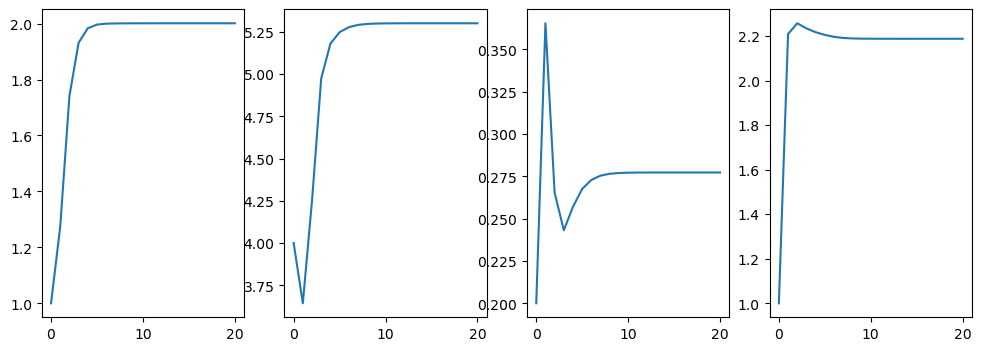

In [287]:
fig, axes = plt.subplots(1, 4, figsize=(12, 4))
axes[0].plot(history['mu1'])
axes[1].plot(history['mu2'])
axes[2].plot(history['sigma1'])
axes[3].plot(history['sigma2'])

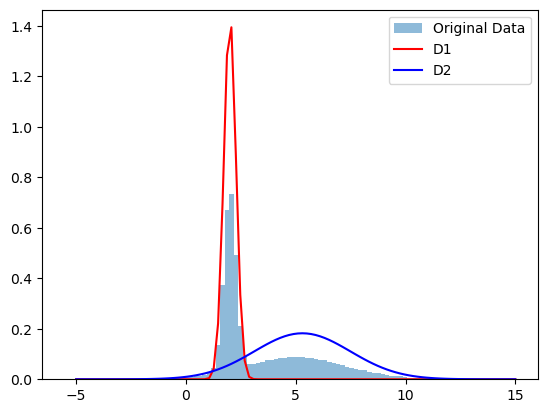

In [296]:
plt.hist(x, bins=100, density=True, alpha=0.5, label='Original Data')
x_axis = np.linspace(-5, 15, 100)

plt.plot(x_axis, norm.pdf(x_axis, loc=mu1, scale=sigma1), 'r', label='D1')
plt.plot(x_axis, norm.pdf(x_axis, loc=mu2, scale=sigma2), 'b', label='D2')
plt.ylim(bottom=0)
plt.legend()